<a href="https://colab.research.google.com/github/yashvyas1405/Covid-19-Detection/blob/main/Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dataset = http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2021-01-09 18:49:28--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-01-09 18:49:28--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-01-09 18:49:29--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-01-09 18:49:30--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
#CNN Based Model
#layered architecture is 
# initially we keep low number of features to get the small patterns
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape =  (224, 224, 3)))# 3,3 because standard
                                                                          # and input shape = height, weight, channels
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [13]:
#Train from scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,    # for normalization
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True  #all the x-ray images should have same vertical orientation
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [16]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [19]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 62s 10s/step - loss: 0.4631 - accuracy: 0.8229 - val_loss: 0.3722 - val_accuracy: 0.9000
Epoch 2/10
6/6 [==============================] - 61s 10s/step - loss: 0.3786 - accuracy: 0.8385 - val_loss: 0.4987 - val_accuracy: 0.9333
Epoch 3/10
6/6 [==============================] - 61s 10s/step - loss: 0.2792 - accuracy: 0.9062 - val_loss: 0.1397 - val_accuracy: 0.9500
Epoch 4/10
6/6 [==============================] - 61s 10s/step - loss: 0.3327 - accuracy: 0.8646 - val_loss: 0.1835 - val_accuracy: 0.9667
Epoch 5/10
6/6 [==============================] - 61s 10s/step - loss: 0.2764 - accuracy: 0.9323 - val_loss: 0.1797 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 61s 10s/step - loss: 0.2007 - accuracy: 0.9219 - val_loss: 0.1184 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 61s 10s/step - loss: 0.1526 - accuracy: 0.9479 - val_loss: 0.0984 - val_accuracy: 0.9667
Epoch 8/10
6/6 [===========

In [ ]:
#we can use grad cam, 

In [20]:
#loss is very less.
model.save('model_final.h5')

In [21]:
#We are getting accuracy of 96.8 on train
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.09244775027036667, 0.96875]

In [22]:
# we are getting accuracy of 98.3 on validation data.
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.04929381608963013, 0.9833333492279053]

In [52]:
model = load_model('model_final.h5')

In [53]:
import os

In [54]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [55]:
y_actual = []
y_test = []

In [56]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [57]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm = confusion_matrix(y_actual, y_test)

In [61]:
import seaborn as sns

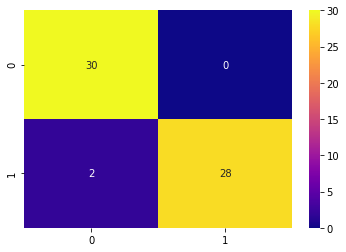

In [62]:
sns.heatmap(cm, cmap = "plasma", annot = True)

We obtain the best confusion matrix.
Both type 1 and type 2 errors are very less.